# **Exploratory Data Analysis (EDA) on a Dataset**

**Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Dataset**

In [2]:
data = pd.read_csv("C://Users//Sadneya//Desktop//AGRATAS_INTERN//Warehouse_and_Retail_Sales.csv")

**Display basic information**

In [3]:
data.shape

(307645, 9)

In [4]:
data.head()#to print first few elements to check data loaded successfully or not

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [5]:
print(data.info())  # Data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB
None


In [6]:
print(data.describe())  # Summary statistics for numerical columns  

                YEAR          MONTH   RETAIL SALES  RETAIL TRANSFERS  \
count  307645.000000  307645.000000  307642.000000     307645.000000   
mean     2018.438525       6.423862       7.024071          6.936465   
std         1.083061       3.461812      30.986238         30.237195   
min      2017.000000       1.000000      -6.490000        -38.490000   
25%      2017.000000       3.000000       0.000000          0.000000   
50%      2019.000000       7.000000       0.320000          0.000000   
75%      2019.000000       9.000000       3.267500          3.000000   
max      2020.000000      12.000000    2739.000000       1990.830000   

       WAREHOUSE SALES  
count    307645.000000  
mean         25.294597  
std         249.916798  
min       -7800.000000  
25%           0.000000  
50%           1.000000  
75%           5.000000  
max       18317.000000  


In [7]:
data.columns.tolist()

['YEAR',
 'MONTH',
 'SUPPLIER',
 'ITEM CODE',
 'ITEM DESCRIPTION',
 'ITEM TYPE',
 'RETAIL SALES',
 'RETAIL TRANSFERS',
 'WAREHOUSE SALES']

**Handle Missing Values**

In [8]:
print(data.isnull().sum()) # Check for missing values

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64


In [9]:
# Fill SUPPLIER with 'Unknown'
data['SUPPLIER'].fillna('Unknown', inplace=True)

# Fill ITEM TYPE with mode
data['ITEM TYPE'].fillna(data['ITEM TYPE'].mode()[0], inplace=True)

# Fill RETAIL SALES with mean
data['RETAIL SALES'].fillna(data['RETAIL SALES'].mean(), inplace=True)

# Verify if missing values are handled
print(data.isnull().sum())


YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64


C:\Users\Sadneya\AppData\Local\Temp\ipykernel_20140\1495640171.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['SUPPLIER'].fillna('Unknown', inplace=True)
C:\Users\Sadneya\AppData\Local\Temp\ipykernel_20140\1495640171.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

**Data Cleaning**
- Check for duplicate rows and inconsistent formatting.

In [10]:
#checking duplicate values 
data.nunique()

YEAR                    4
MONTH                  12
SUPPLIER              397
ITEM CODE           34056
ITEM DESCRIPTION    34822
ITEM TYPE               8
RETAIL SALES        10675
RETAIL TRANSFERS     2504
WAREHOUSE SALES      4895
dtype: int64

In [11]:
# Remove duplicates
data = data.drop_duplicates()

# Clean column names
data.columns = [col.strip() for col in data.columns]  # Remove leading/trailing spaces


**Univariate Analysis**
- Analyze individual columns using histograms and boxplots.
- plotting the right charts can help us better understand the data, which is why data visualization is so important.

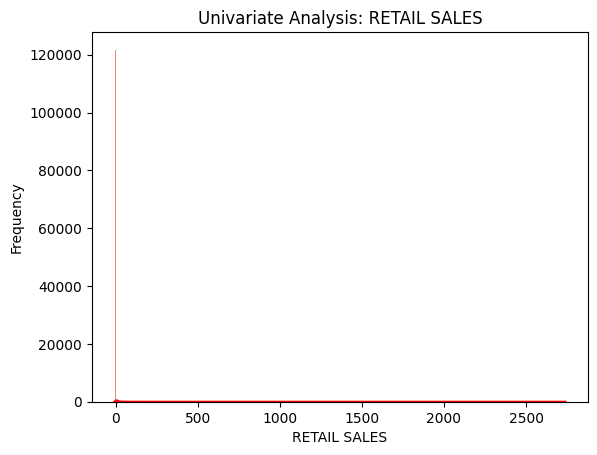

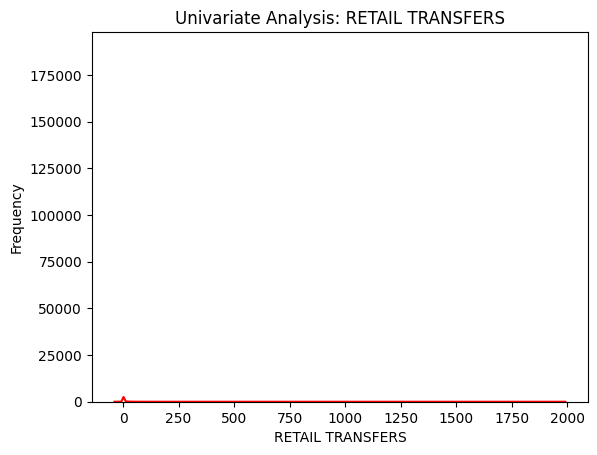

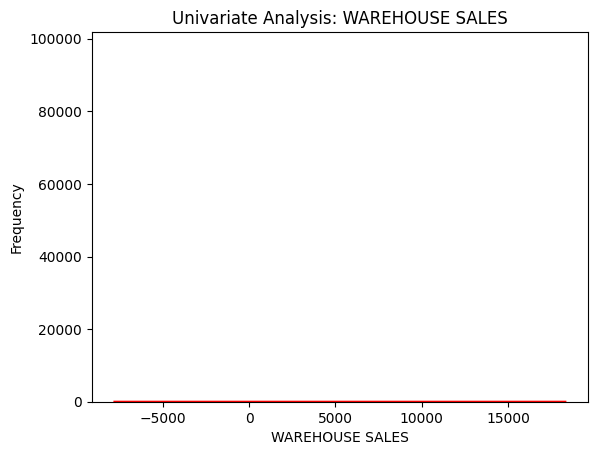

In [12]:
# Univariate analysis: Histograms for numerical columns
numerical_cols = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']

for col in numerical_cols:
    sns.histplot(data[col], kde=True, color='red')
    plt.title(f'Univariate Analysis: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

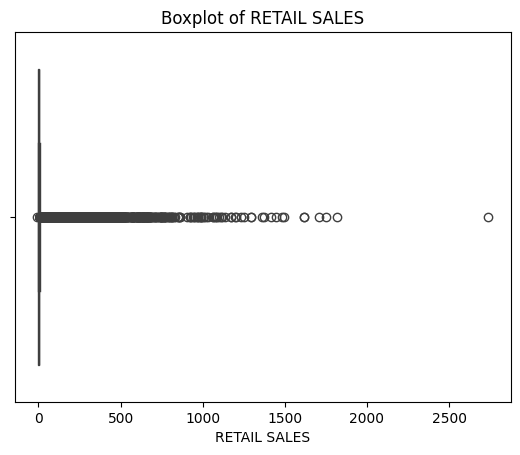

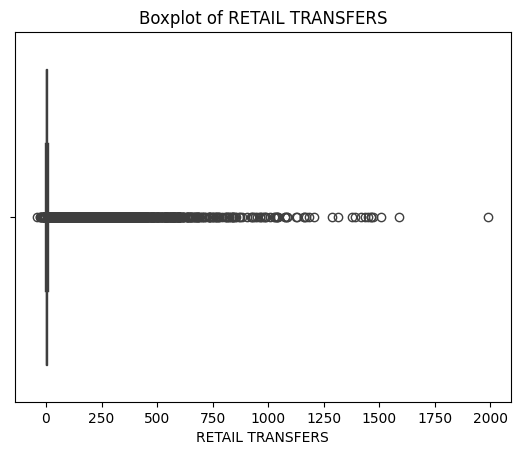

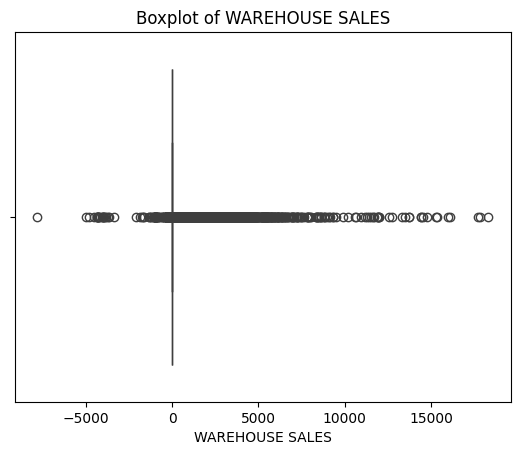

In [13]:
# Boxplot for detecting outliers
numerical_cols = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']

for col in numerical_cols:
    sns.boxplot(x= data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()





Here, boxplots are just showing like a single line, it likely indicates that the numerical columns (RETAIL SALES, RETAIL TRANSFERS, WAREHOUSE SALES) have little or no variation, or that the data in these columns contains extreme outliers or is not distributed properly.

c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


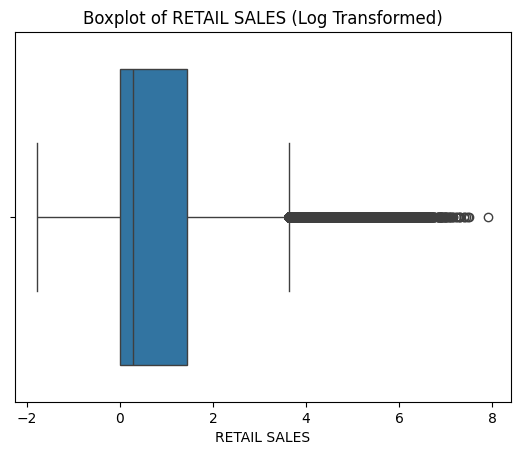

c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


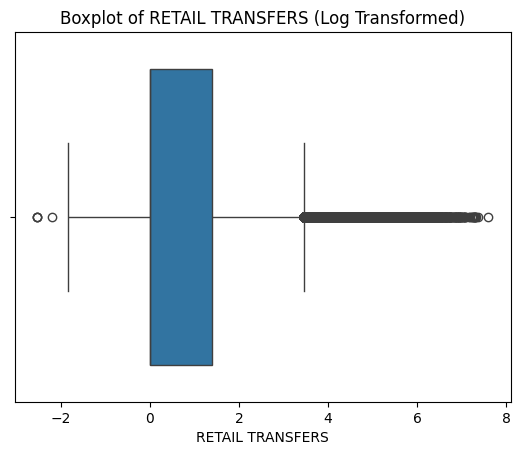

c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


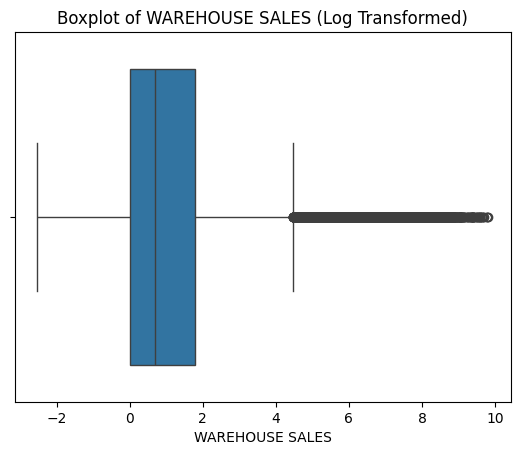

In [14]:
import numpy as np
for col in numerical_cols:
    sns.boxplot(x=np.log1p(data[col]))  # Log transform to handle skewness
    plt.title(f'Boxplot of {col} (Log Transformed)')
    plt.show()

**Kernel density** plot for understanding variance in the dataset

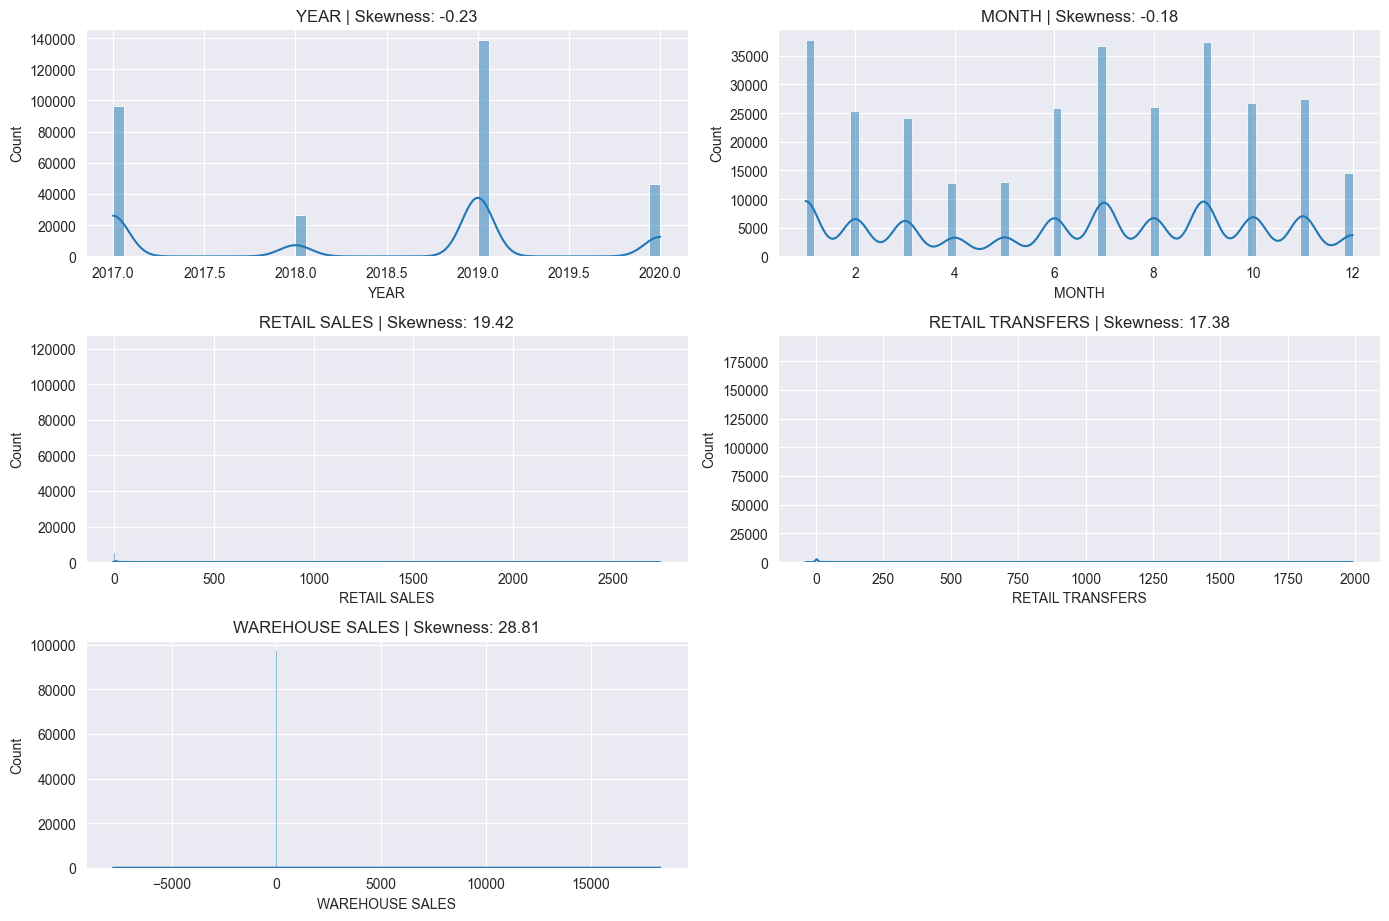

In [15]:
sns.set_style("darkgrid")

numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(data[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(data[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

- The features in this dataset that have skewness – exactly 0 depicts the symmetrical distribution and the plots with skewness 1 or above 1 is positively or right skewd distribution. 
- In right skewd or positively skewed distribution if the tail is more on the right side, that indicates extremely high values.

**Bivariate Analysis**
- Analyze relationships between pairs of variables using scatter plots and correlation matrices.

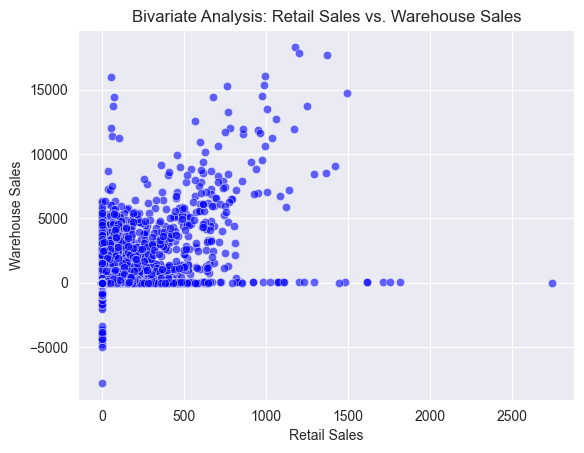

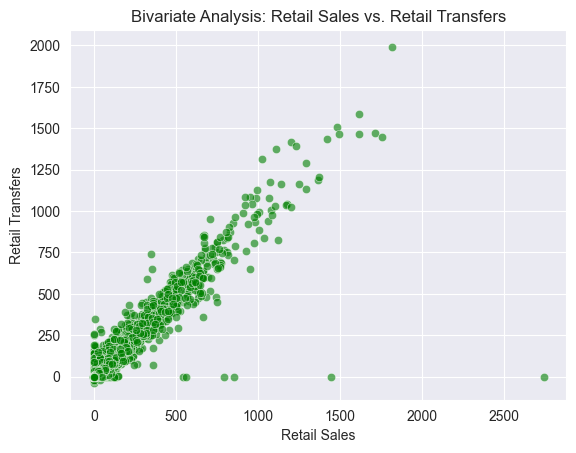

In [16]:
# Bivariate analysis: Scatter plot for RETAIL SALES vs. WAREHOUSE SALES
sns.scatterplot(x='RETAIL SALES', y='WAREHOUSE SALES', data=data, color='blue', alpha=0.6)
plt.title('Bivariate Analysis: Retail Sales vs. Warehouse Sales')
plt.xlabel('Retail Sales')
plt.ylabel('Warehouse Sales')
plt.show()

sns.scatterplot(x='RETAIL SALES', y='RETAIL TRANSFERS', data=data, color='green', alpha=0.6)
plt.title('Bivariate Analysis: Retail Sales vs. Retail Transfers')
plt.xlabel('Retail Sales')
plt.ylabel('Retail Transfers')
plt.show()

**Multivariate Analysis** for understanding complex relationships and patterns among multiple variables effectively

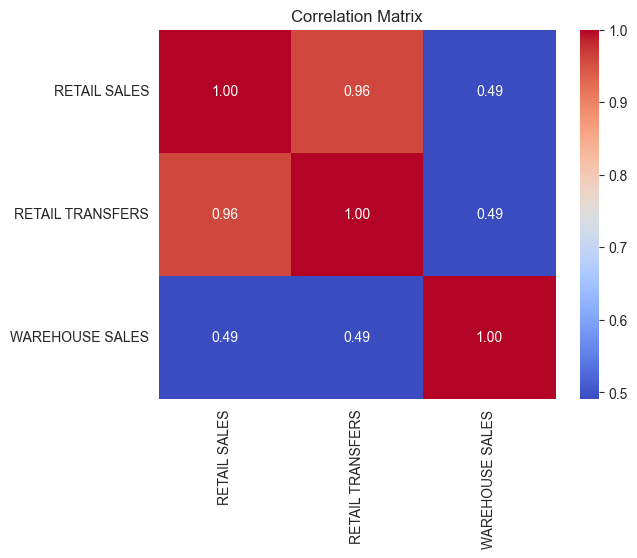

In [17]:
# Select numerical columns for the correlation matrix
numerical_cols = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']

# Compute the correlation matrix
correlation = data[numerical_cols].corr()

# Plot the heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Grouped Analysis**
- Analyze data by categorical columns like State, Market, and Product Type.

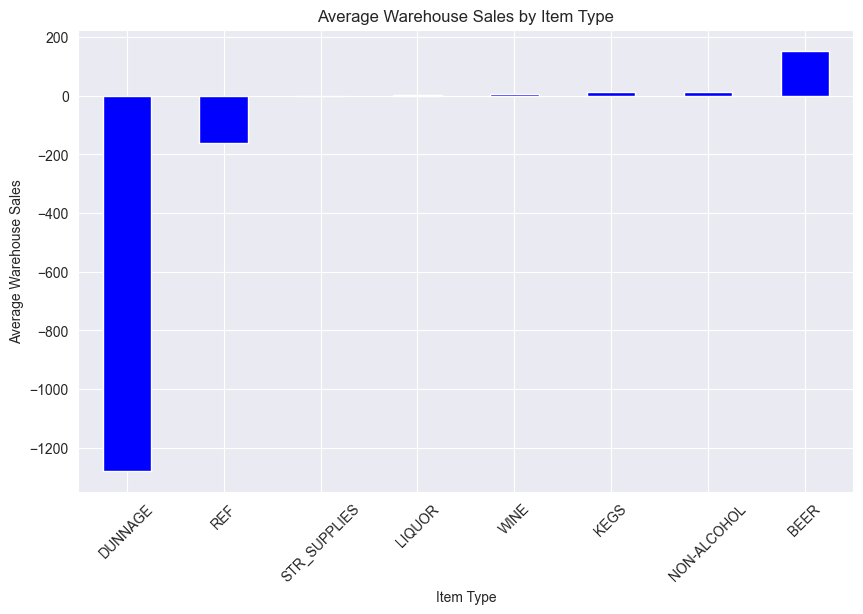

In [18]:
# Grouped analysis: Mean Warehouse Sales by Item Type
item_type_sales = data.groupby('ITEM TYPE')['WAREHOUSE SALES'].mean().sort_values()

# Plot the results
item_type_sales.plot(kind='bar', title='Average Warehouse Sales by Item Type', figsize=(10, 6), color='blue')
plt.ylabel('Average Warehouse Sales')
plt.xlabel('Item Type')
plt.xticks(rotation=45)
plt.show()
